In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# --- 1. Load datasets ---
df_cleaned_data = pd.read_csv("merged_cleandata.csv")
df_patient_data = pd.read_csv("demographic_cleandata.csv")

# --- 2. Convert time to datetime ---
df_cleaned_data["time"] = pd.to_datetime(df_cleaned_data["time"])
type(df_cleaned_data)

# --- 3. Merge on patient ID ---
merged_data = df_cleaned_data.merge(
    df_patient_data,
    left_on="patient_id",
    right_on="patient_id",
    how="left"
)

# --- 4. Set MultiIndex with (patient_id, time) ---
merged_data = merged_data.set_index(["patient_id", "time"]).sort_index()


print(merged_data.index.names)   # should show ['patient_id', 'time']
type(merged_data)

['patient_id', 'time']


pandas.core.frame.DataFrame

In [11]:
merged_data.head()

glucose  calories  heart_rate  steps  \
patient_id time                                                        
HUPA0001P  2018-06-13 18:40:00    332.0     6.360      82.323   34.0   
           2018-06-13 18:45:00    326.0     7.728      83.740    0.0   
           2018-06-13 18:50:00    330.0     4.750      80.525    0.0   
           2018-06-13 18:55:00    324.0     6.359      89.129   20.0   
           2018-06-13 19:00:00    306.0     5.152      92.496    0.0   

                                basal_rate  bolus_volume_delivered  \
patient_id time                                                      
HUPA0001P  2018-06-13 18:40:00    0.091667                     0.0   
           2018-06-13 18:45:00    0.091667                     0.0   
           2018-06-13 18:50:00    0.091667                     0.0   
           2018-06-13 18:55:00    0.091667                     0.0   
           2018-06-13 19:00:00    0.075000                     0.0   

                                carb_input glucose_range_level  \
patient_id time                                                  
HUPA0001P  2018-06-13 18:40:00         0.0         Above Range   
           2018-06-13 18:45:00         0.0         Above Range   
           2018-06-13 18:50:00         0.0         Above Range   
           2018-06-13 18:55:00         0.0         Above Range   
           2018-06-13 19:00:00         0.0         Above Range   

                               calories_categories HR_Category  age gender  \
patient_id time                                                              
HUPA0001P  2018-06-13 18:40:00      Light Activity      Normal   34   Male   
           2018-06-13 18:45:00      Light Activity      Normal   34   Male   
           2018-06-13 18:50:00             Resting      Normal   34   Male   
           2018-06-13 18:55:00      Light Activity      Normal   34   Male   
           2018-06-13 19:00:00      Light Activity      Normal   34   Male   

                                 race  sleep_duration  sleep_quality  \
patient_id time                                                        
HUPA0001P  2018-06-13 18:40:00  Other             6.3            4.5   
           2018-06-13 18:45:00  Other             6.3            4.5   
           2018-06-13 18:50:00  Other             6.3            4.5   
           2018-06-13 18:55:00  Other             6.3            4.5   
           2018-06-13 19:00:00  Other             6.3            4.5   

                                sleep_disturbance_percent  
patient_id time                                            
HUPA0001P  2018-06-13 18:40:00                         80  
           2018-06-13 18:45:00                         80  
           2018-06-13 18:50:00                         80  
           2018-06-13 18:55:00                         80  
           2018-06-13 19:00:00                         80

In [5]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 90539 entries, ('HUPA0001P', Timestamp('2018-06-13 18:40:00')) to ('HUPA0028P', Timestamp('2022-05-18 12:15:00'))
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   glucose                    90539 non-null  float64
 1   calories                   90539 non-null  float64
 2   heart_rate                 90539 non-null  float64
 3   steps                      90539 non-null  float64
 4   basal_rate                 90539 non-null  float64
 5   bolus_volume_delivered     90539 non-null  float64
 6   carb_input                 90539 non-null  float64
 7   glucose_range_level        90539 non-null  object 
 8   calories_categories        90539 non-null  object 
 9   HR_Category                90539 non-null  object 
 10  age                        90539 non-null  int64  
 11  gender                     90539 non-null  object 
 12  race          

<b> <h3> 1. Show the distribution of glucose range across genders </h3> </b>

<b>Reasoning:</b> Glucose control can be influenced by both biological and behavioral factors. By comparing glucose range distributions across genders, we can highlight possible differences in diabetes management needs between male and female and provide personalized treatment. Used stacked bar to avoid bias because of unequal records. Males tend to have a slightly higher proportion of time In Range, while females show a higher share of above-range glucose.



📊 Absolute Counts by Gender and Glucose Range:

glucose_range_level  Above Range  Below Range  In Range
gender                                                 
Female                     11460         2052     19191
Male                       17241         4517     36078

📈 Percentages by Gender and Glucose Range:

glucose_range_level  Above Range  Below Range  In Range
gender                                                 
Female                     35.04         6.27     58.68
Male                       29.81         7.81     62.38


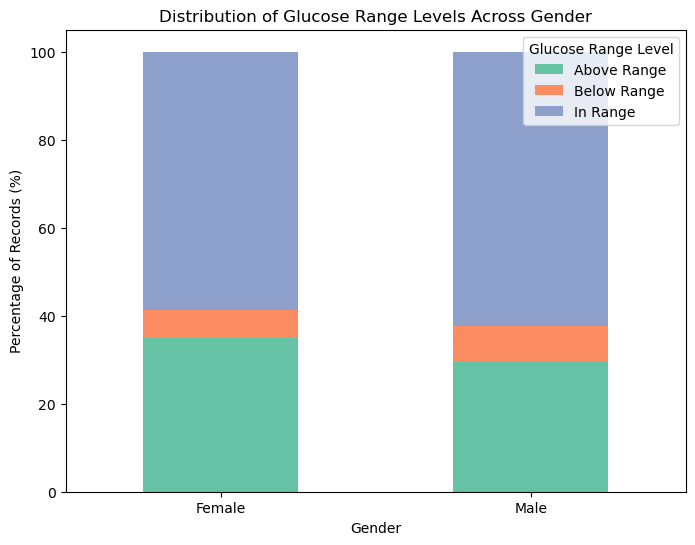

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
demo = pd.read_csv("demographic_cleandata.csv")
merged = pd.read_csv("merged_cleandata.csv")

# Merge gender info into main dataset
df = merged.merge(demo[["patient_id", "gender"]], on="patient_id", how="left")

# Count distribution of glucose levels across gender
glucose_gender_dist = df.groupby(["gender", "glucose_range_level"]).size().reset_index(name="count")

# Pivot for bar chart
pivot_dist = glucose_gender_dist.pivot(index="gender", columns="glucose_range_level", values="count").fillna(0)

# Convert counts to percentage
pivot_dist_pct = pivot_dist.div(pivot_dist.sum(axis=1), axis=0) * 100

# Print summary tables
print("\n📊 Absolute Counts by Gender and Glucose Range:\n")
print(pivot_dist)

print("\n📈 Percentages by Gender and Glucose Range:\n")
print(pivot_dist_pct.round(2))

# Plot stacked bar chart
pivot_dist_pct.plot(kind="bar", stacked=True, figsize=(8,6), 
                    color=["#66c2a5", "#fc8d62", "#8da0cb"])
plt.title("Distribution of Glucose Range Levels Across Gender")
plt.xlabel("Gender")
plt.ylabel("Percentage of Records (%)")
plt.legend(title="Glucose Range Level")
plt.xticks(rotation=0)
plt.show()


<b> <h3> 2. List the top 5 patients that spent maximum time out of range wrto. glucose and heart rate </h3></b>

<b>Reasoning:</b> It combines two important clinical factors glucose control and cardiovascular health and identifies patients who is most at risk and may need clincal intervention. 




Top 5 patients with maximum glucose out-of-range counts:
   patient_id  glucose_out_count
23  HUPA0027P              33947
22  HUPA0026P              18866
24  HUPA0028P               2904
13  HUPA0017P               2314
7   HUPA0009P               2232

Top 5 patients with maximum heart rate out-of-range counts:
   patient_id  heart_out_count
23  HUPA0027P            15680
22  HUPA0026P             2141
24  HUPA0028P             1470
12  HUPA0016P             1207
13  HUPA0017P              491

Combined (glucose + heart rate):
  patient_id  glucose_out_count  heart_out_count  total_out
4  HUPA0027P            33947.0          15680.0    49627.0
3  HUPA0026P            18866.0           2141.0    21007.0
5  HUPA0028P             2904.0           1470.0     4374.0
2  HUPA0017P             2314.0            491.0     2805.0
0  HUPA0009P             2232.0              0.0     2232.0


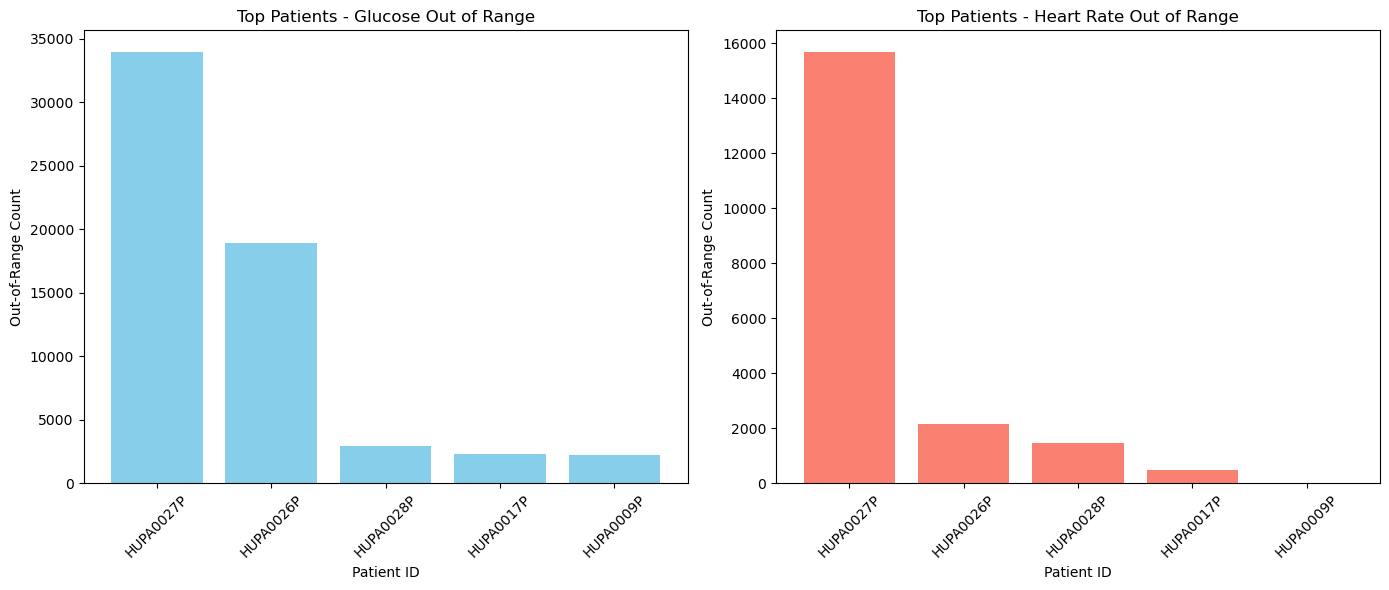

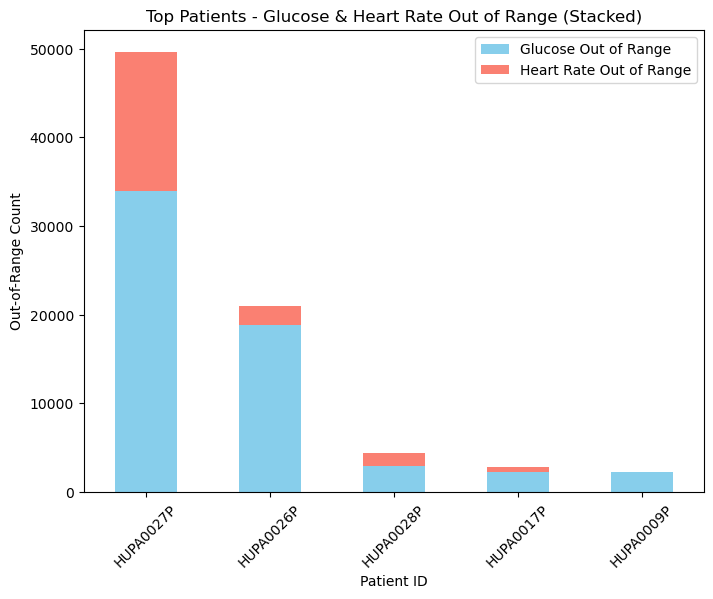

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Glucose Out-of-Range Counts ---
glucose_out = (
    merged_data[merged_data["glucose_range_level"] != "In Range"]
    .groupby("patient_id")
    .size()
    .reset_index(name="glucose_out_count")
    .sort_values(by="glucose_out_count", ascending=False)
    .head(5)
)

# --- 2. Heart Rate Out-of-Range Counts ---
heart_out = (
    merged_data[merged_data["HR_Category"] != "Normal"]
    .groupby("patient_id")
    .size()
    .reset_index(name="heart_out_count")
    .sort_values(by="heart_out_count", ascending=False)
    .head(5)
)

# --- 3. Merge both counts ---
out_summary = pd.merge(glucose_out, heart_out, on="patient_id", how="outer").fillna(0)

# Sort by total out-of-range counts
out_summary["total_out"] = out_summary["glucose_out_count"] + out_summary["heart_out_count"]
out_summary = out_summary.sort_values(by="total_out", ascending=False).head(5)


print("Top 5 patients with maximum glucose out-of-range counts:")
print(glucose_out)

print("\nTop 5 patients with maximum heart rate out-of-range counts:")
print(heart_out)

print("\nCombined (glucose + heart rate):")
print(out_summary)

# --- 4. Plot Side-by-Side Charts ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Glucose bar chart
axes[0].bar(out_summary["patient_id"], out_summary["glucose_out_count"], color="skyblue")
axes[0].set_title("Top Patients - Glucose Out of Range")
axes[0].set_xlabel("Patient ID")
axes[0].set_ylabel("Out-of-Range Count")
axes[0].tick_params(axis="x", rotation=45)

# Heart Rate bar chart
axes[1].bar(out_summary["patient_id"], out_summary["heart_out_count"], color="salmon")
axes[1].set_title("Top Patients - Heart Rate Out of Range")
axes[1].set_xlabel("Patient ID")
axes[1].set_ylabel("Out-of-Range Count")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

# --- 5. Combined Stacked Bar Chart ---
out_summary.set_index("patient_id")[["glucose_out_count", "heart_out_count"]].plot(
    kind="bar", stacked=True, figsize=(8, 6), color=["skyblue", "salmon"]
)

plt.title("Top Patients - Glucose & Heart Rate Out of Range (Stacked)")
plt.xlabel("Patient ID")
plt.ylabel("Out-of-Range Count")
plt.xticks(rotation=45)
plt.legend(["Glucose Out of Range", "Heart Rate Out of Range"])
plt.show()


<h3> <b> 3. Is there a significant correlation between blood glucose levels, sleep disturbance, and sleep quality scores? </b> </h3>

<b>Reasoning:</b> This question explores whether sleep quality and disturbances are strongly linked with blood sugar levels. The results shows moderate correlation between glucose levels and sleep disturbance which means glucose levels tend to be associated with more frequent sleep disturbances but does not impact sleep quality. 


Correlation (Glucose vs % Sleep Disturbances): 0.25
Correlation (Glucose vs Sleep Quality): 0.09


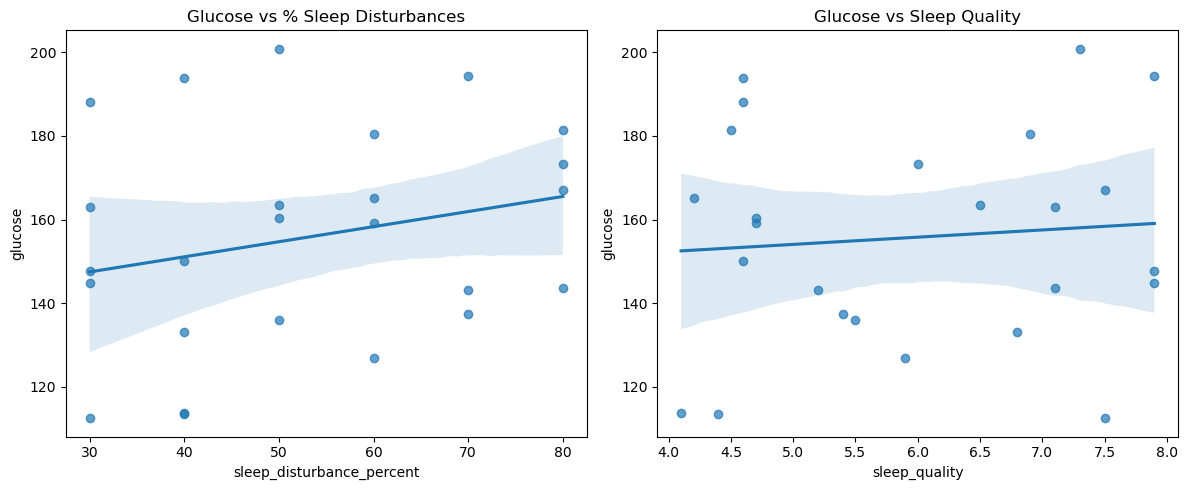

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Average glucose per patient ---
avg_glucose = merged_data.groupby("patient_id")["glucose"].mean().reset_index()

# --- Merge with sleep data ---
glucose_sleep = avg_glucose.merge(
    df_patient_data[["patient_id", "sleep_disturbance_percent", "sleep_quality"]],
    left_on="patient_id", right_on="patient_id", how="inner"
)

# --- Correlation values ---
corr_disturb = glucose_sleep["glucose"].corr(glucose_sleep["sleep_disturbance_percent"])
corr_quality = glucose_sleep["glucose"].corr(glucose_sleep["sleep_quality"])

print(f"Correlation (Glucose vs % Sleep Disturbances): {corr_disturb:.2f}")
print(f"Correlation (Glucose vs Sleep Quality): {corr_quality:.2f}")

# --- Visualization: scatter plots side by side ---
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Glucose vs Disturbances
sns.regplot(
    data=glucose_sleep,
    x="sleep_disturbance_percent",
    y="glucose",
    scatter_kws={'alpha':0.7},
    ax=axes[0]
)
axes[0].set_title("Glucose vs % Sleep Disturbances")

# Glucose vs Quality
sns.regplot(
    data=glucose_sleep,
    x="sleep_quality",
    y="glucose",
    scatter_kws={'alpha':0.7},
    ax=axes[1]
)
axes[1].set_title("Glucose vs Sleep Quality")

plt.tight_layout()
plt.show()


<b> <h3> 4. How do blood glucose levels differ across racial groups and how strongly are these differences associated with age? </h3> </b>

<b> Reasoning: </b> By asking this question we are determing whether average glucose levels differ significantly across racial groups and assess if age factor plays any role. The results shows that blood glucose levels differ across racial groups, and the way they change with age is not consistent across groups with the given data.

               Race Age_Group_Label  mean_glucose
0             Asian           19–33        135.89
1             Asian           50–63        166.94
2             Black           19–33        137.33
3             Black           40–50        156.57
4             Black           50–63        129.63
5             Black           63–74        138.16
6          Hispanic           19–33        162.99
7          Hispanic           40–50        113.47
8          Hispanic           63–74        200.80
9   Native American           19–33        143.68
10  Native American           33–40        180.38
11  Native American           40–50        130.77
12  Native American           63–74        173.15
13            Other           19–33        163.52
14            Other           33–40        147.00
15            Other           50–63        159.11
16            Other           63–74        193.74
17            White           19–33        194.28
18            White           33–40        165.20


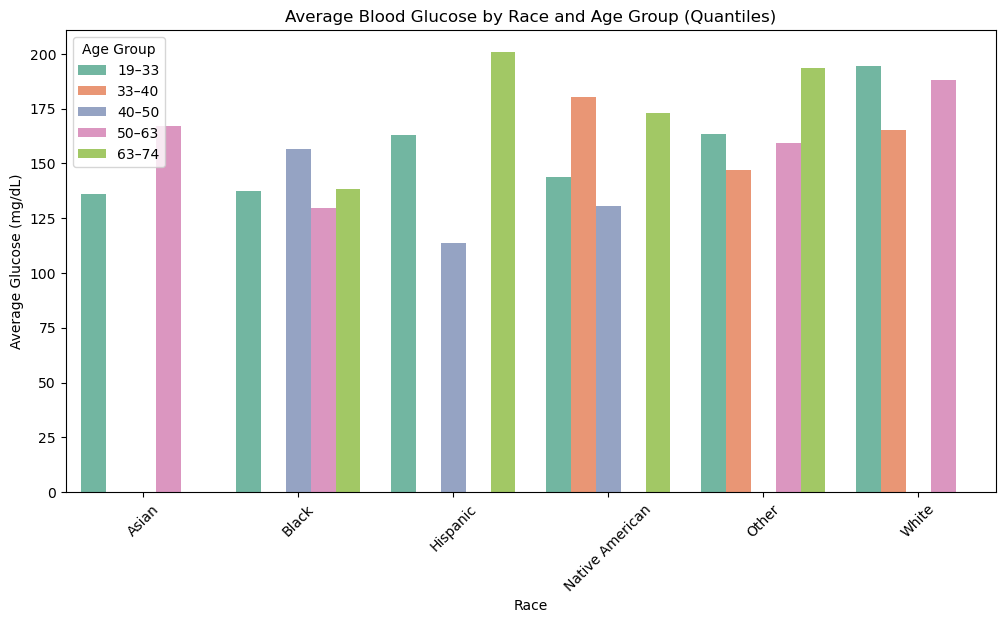

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute per-patient average glucose
patient_summary = (
    merged_data.groupby(["patient_id", "Race", "Age"])["glucose"]
    .mean()
    .reset_index(name="mean_glucose")
)

# creat age quantiles
patient_summary["Age_Group"] = pd.qcut(patient_summary["Age"], q=5)

#summarize patient info
patient_summary["Age_Group_Label"] = patient_summary["Age_Group"].apply(
    lambda x: f"{int(x.left)}–{int(x.right)}"
)

# average glucose by Race and Age_Group 
avg_glucose_by_race_age = (
    patient_summary.groupby(["Race", "Age_Group_Label"], observed=True)["mean_glucose"]
    .mean().round(2)
    .reset_index()
)

print(avg_glucose_by_race_age)

# --- Step 5: Grouped bar chart ---
plt.figure(figsize=(12,6))
sns.barplot(
    data=avg_glucose_by_race_age,
    x="Race",
    y="mean_glucose",
    hue="Age_Group_Label",
    palette="Set2"
)
plt.title("Average Blood Glucose by Race and Age Group (Quantiles)")
plt.ylabel("Average Glucose (mg/dL)")
plt.xlabel("Race")
plt.xticks(rotation=45)
plt.legend(title="Age Group")
plt.show()


<b> <h3> 5. How does blood glucose fluctuations correlate with heart rate?  </h3> </b>
<b> Reasoning: </b> This questions whether heart rate can act as a signal for detecting or predicting glucose instability, and whether that relationship is universal or patient-specific. Here glucose fluctuation is calculated as the absolute difference in glucose values between consecutive readings for each patient.From the results it shows there is modest positive correlation between glucose fluctuation and heart rate


Overall correlation (Spearman): 0.15536286565782106
   patient_id      corr
17  HUPA0021P  0.366627
9   HUPA0011P  0.317547
6   HUPA0007P  0.316294
24  HUPA0028P  0.296002
22  HUPA0026P  0.289322
15  HUPA0019P  0.284131
5   HUPA0006P  0.270670
1   HUPA0002P  0.263972
23  HUPA0027P  0.262407
19  HUPA0023P  0.243453
14  HUPA0018P  0.234460
13  HUPA0017P  0.192248
3   HUPA0004P  0.187497
16  HUPA0020P  0.176778
10  HUPA0014P  0.175191
12  HUPA0016P  0.164261
11  HUPA0015P  0.162212
18  HUPA0022P  0.138469
2   HUPA0003P  0.127003
8   HUPA0010P  0.126491
7   HUPA0009P  0.120711
21  HUPA0025P  0.100059
0   HUPA0001P  0.094234
20  HUPA0024P  0.045411
4   HUPA0005P  0.013863


C:\Users\gayat\AppData\Local\Temp\ipykernel_29264\1781836324.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  patient_corrs = df.groupby("patient_id").apply(
C:\Users\gayat\AppData\Local\Temp\ipykernel_29264\1781836324.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=patient_corrs, x="patient_id", y="corr", palette="coolwarm")


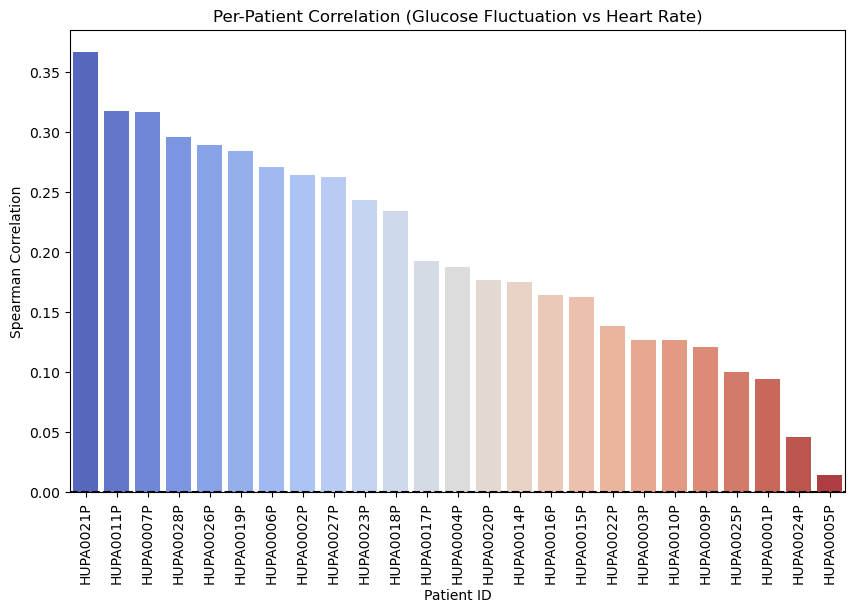

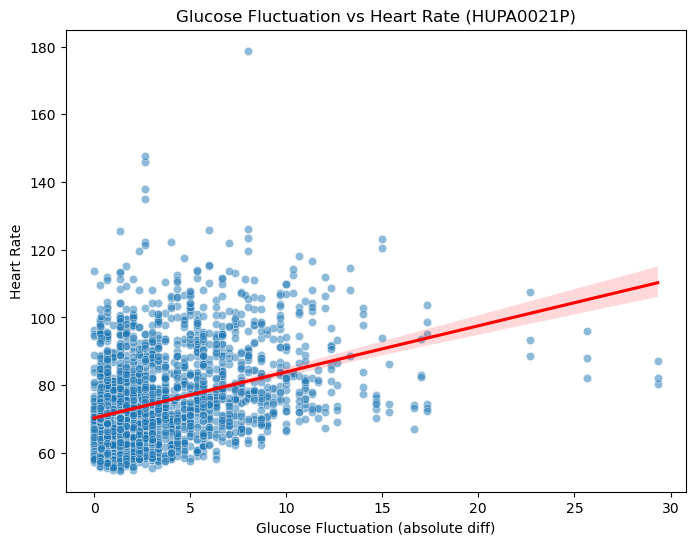

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ---- Load Data ----
df = pd.read_csv("merged_cleandata.csv")
df['time'] = pd.to_datetime(df['time'])
df = df.sort_values(['patient_id', 'time'])

# ---- Step 1: Compute glucose fluctuations (absolute consecutive difference) ----
df['glucose_fluctuation'] = df.groupby('patient_id')['glucose'].diff().abs()
df = df.dropna(subset=['glucose_fluctuation'])

# ---- Step 2: Overall correlation (Spearman) ----
overall_corr = df['glucose_fluctuation'].corr(df['heart_rate'], method='spearman')
print("Overall correlation (Spearman):", overall_corr)

# ---- Step 3: Per-patient correlations ----
patient_corrs = df.groupby("patient_id").apply(
    lambda g: g["glucose_fluctuation"].corr(g["heart_rate"], method="spearman")
).reset_index(name="corr")

# Sort by correlation
patient_corrs = patient_corrs.sort_values("corr", ascending=False)
print(patient_corrs)

# ---- Step 4: Visualization of per-patient correlations ----
plt.figure(figsize=(10,6))
sns.barplot(data=patient_corrs, x="patient_id", y="corr", palette="coolwarm")
plt.xticks(rotation=90)
plt.axhline(0, color="black", linestyle="--")
plt.title("Per-Patient Correlation (Glucose Fluctuation vs Heart Rate)")
plt.ylabel("Spearman Correlation")
plt.xlabel("Patient ID")
plt.show()

# ---- Step 5: Example visualization for strongest patient ----
strongest_patient = patient_corrs.iloc[0]['patient_id']
sample = df[df['patient_id'] == strongest_patient]

plt.figure(figsize=(8,6))
sns.scatterplot(data=sample, x="glucose_fluctuation", y="heart_rate", alpha=0.5)
sns.regplot(data=sample, x="glucose_fluctuation", y="heart_rate",
            scatter=False, color="red")
plt.title(f"Glucose Fluctuation vs Heart Rate ({strongest_patient})")
plt.xlabel("Glucose Fluctuation (absolute diff)")
plt.ylabel("Heart Rate")
plt.show()


<b> <h3> 6. How do rolling averages of heart rate vary during periods of high vs. low blood glucose for each patient? </h3> </b>

<b> Reasoning: </b>This question mainly uncovers heart rate behaviour of each patient under different glycemic conditions. Here we took rolling data of heart rate every 6 hours per day for each patient to reduce noise. 

Summary table of 6-hour rolling HR by glucose range level:
glucose_range_level  Above Range  Below Range   In Range
patient_id                                              
HUPA0001P              82.380448    80.192811  79.798253
HUPA0002P              68.696965    64.813075  66.843293
HUPA0003P              77.264411    72.683572  78.919539
HUPA0004P              78.702707    76.517853  78.041567
HUPA0005P              83.425782    84.045728  84.853504
HUPA0006P              65.117654    70.988403  65.184151
HUPA0007P              70.194814    68.138688  70.582550
HUPA0009P              84.144681     0.000000  85.303073
HUPA0010P              79.308084    77.096671  78.176105
HUPA0011P              77.279949    68.800328  72.505179
HUPA0014P              78.300530    91.583678  86.812073
HUPA0015P              70.062684    67.942754  67.562498
HUPA0016P              85.323537    89.078362  92.981049
HUPA0017P              80.547532    87.046255  84.519620
HUPA0018P              75.609

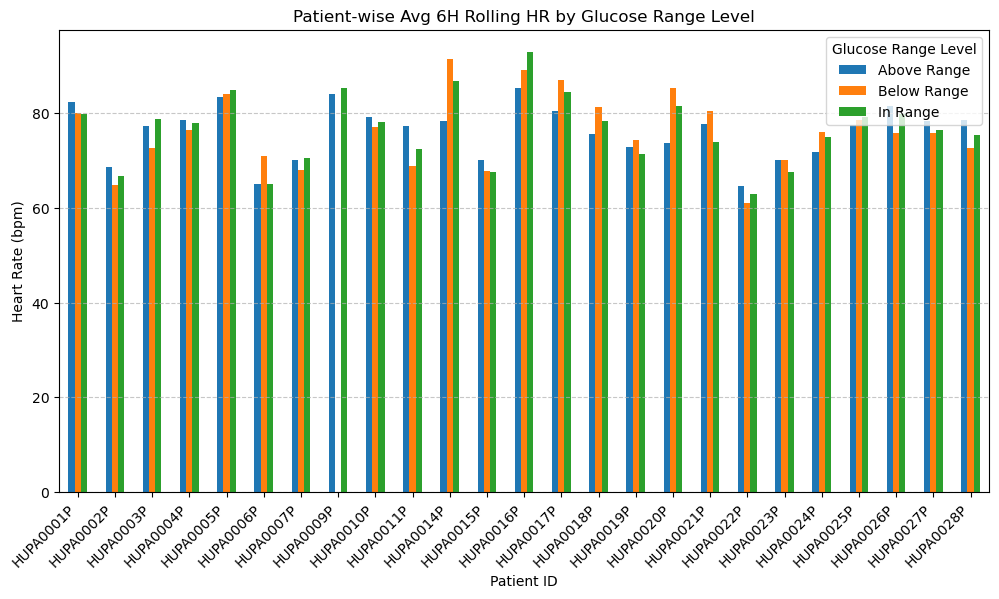

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------
# Step 1: Load and prepare data
# --------------------------
df = pd.read_csv("merged_cleandata.csv", parse_dates=["time"])
df = df.sort_values(["patient_id", "time"])

# Rolling 6-hour average HR per patient 
df["hr_rolling6h"] = (
    df.groupby("patient_id", group_keys=False)[["time", "heart_rate"]]
      .apply(lambda g: (
          g.set_index("time")["heart_rate"]
           .rolling("6h", min_periods=1)
           .mean()
           .reset_index(drop=True)
      ))
      .reset_index(drop=True)
)

# Summary table for each patient

summary = (
    df.groupby(["patient_id", "glucose_range_level"])["hr_rolling6h"]
      .mean()
      .unstack(fill_value=0)
)
print("Summary table of 6-hour rolling HR by glucose range level:")
print(summary)

#Side-by-side comparison across patients

summary.plot(kind="bar", figsize=(12,6))

plt.title("Patient-wise Avg 6H Rolling HR by Glucose Range Level")
plt.ylabel("Heart Rate (bpm)")
plt.xlabel("Patient ID")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Glucose Range Level")
plt.show()

<b> <h3> 7. How do nighttime glucose spike rates (10 pm–6 am) differ across age groups (<50 vs ≥50) and genders (male vs female)? </h3> </b>
<b> Reasoning: </b> Nighttime glucose spikes are particularly risky because they often go unnoticed during sleep. Here I'm considering age and gender that are known modifiers of glucose regulation and comparing the data set given. As per given dataset the younger patients, specially younger males are more prone to night time glucose spikes 

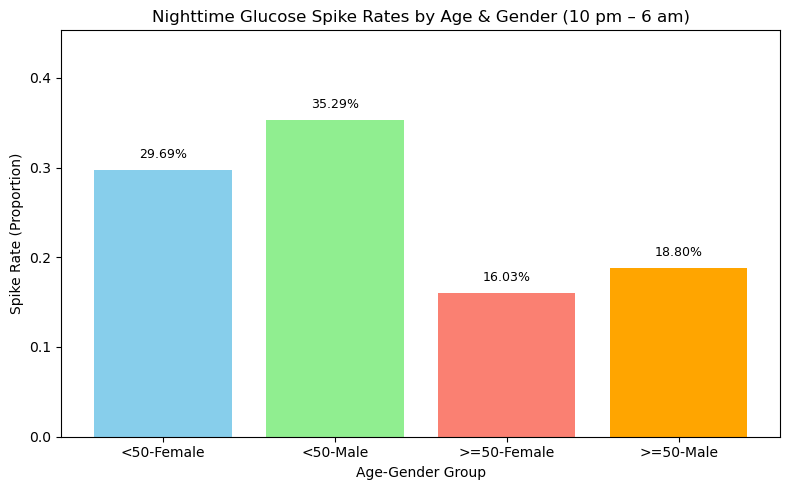

,age_gender_group,night_spike_rate
0,<50-Female,0.296868
1,<50-Male,0.352887
2,>=50-Female,0.160262
3,>=50-Male,0.187994


In [40]:
# Load datasets
df = pd.read_csv("merged_cleandata.csv", parse_dates=["time"])
demo = pd.read_csv("demographic_cleandata.csv")

# Merge on patient_id to bring in age and gender
df = df.merge(demo[["patient_id", "age", "gender"]], on="patient_id", how="left")

# Define nighttime hours (10pm–6am)
hours = df["time"].dt.hour
night = df[(hours >= 22) | (hours < 6)].copy()

# Spike indicator
night["is_spike"] = (night["glucose_range_level"] == "Above Range").astype(int)

# Create combined age+gender groups
night["age_gender_group"] = night.apply(
    lambda row: ("<50" if row["age"] < 50 else ">=50") + "-" + str(row["gender"]), axis=1
)

# Compute spike rate for each group
spike_rates_gender = (
    night.groupby("age_gender_group")["is_spike"]
         .mean()
         .rename("night_spike_rate")
         .reset_index()
)

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(spike_rates_gender["age_gender_group"], 
        spike_rates_gender["night_spike_rate"], 
        color=["skyblue","lightgreen","salmon","orange"])

plt.title("Nighttime Glucose Spike Rates by Age & Gender (10 pm – 6 am)", fontsize=12)
plt.ylabel("Spike Rate (Proportion)", fontsize=10)
plt.xlabel("Age-Gender Group", fontsize=10)

# Add percentage labels
for i, val in enumerate(spike_rates_gender["night_spike_rate"]):
    plt.text(i, val + 0.01, f"{val:.2%}", ha='center', va='bottom', fontsize=9)

plt.ylim(0, spike_rates_gender["night_spike_rate"].max() + 0.1)
plt.tight_layout()
plt.show()

spike_rates_gender


<b> <h3> 8. What percentage of patients fall into low, medium, or high daily steps groups? </h3> </b>
<b> Reasoning </b> This is an activity level analysis question which helps to understand the baseline measure of how active your patient population is, which directly influences glucose control, cardiovascular health, and sleep quality.

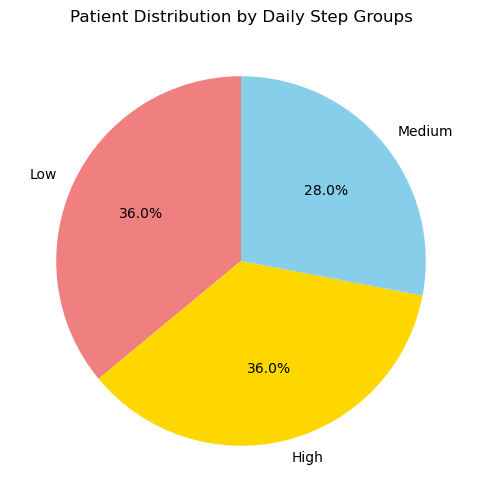

step_group
Low       36.0
High      36.0
Medium    28.0
Name: proportion, dtype: float64

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("merged_cleandata.csv", parse_dates=["time"])


# Aggregate steps per patient (daily average or total)
patient_steps = df.groupby("patient_id")["steps"].mean().reset_index(name="avg_daily_steps")

# Define step groups (low, medium, high) 
patient_steps["step_group"] = pd.qcut(patient_steps["avg_daily_steps"], 
                                      q=3, 
                                      labels=["Low", "Medium", "High"])

# Count percentages
step_group_counts = patient_steps["step_group"].value_counts(normalize=True) * 100

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(step_group_counts, labels=step_group_counts.index, 
        autopct="%1.1f%%", startangle=90, colors=["lightcoral","gold","skyblue"])
plt.title("Patient Distribution by Daily Step Groups", fontsize=12)
plt.show()

step_group_counts


<b> <h3> 9. What is the overall distribution of sleep duration across the dataset, and how does this distribution differ between male and female patients? </h3> </b>
<b>Reasoning: </b> Sleep is closely associated with glucose regulation and this query helps to discover if there are any systematic differences in sleep duration by gender.

        count      mean       std  min    25%   50%  75%  max
gender                                                       
Female    9.0  5.733333  0.469042  5.1  5.500  5.70  5.9  6.6
Male     16.0  6.106250  0.739792  5.0  5.375  6.15  6.6  7.2


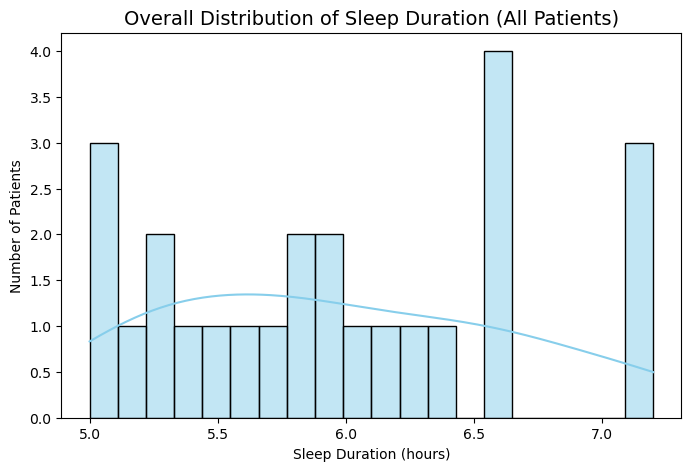

C:\Users\gayat\AppData\Local\Temp\ipykernel_29264\3901160949.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="gender", y="sleep_duration", data=demo_df, palette="Set2")


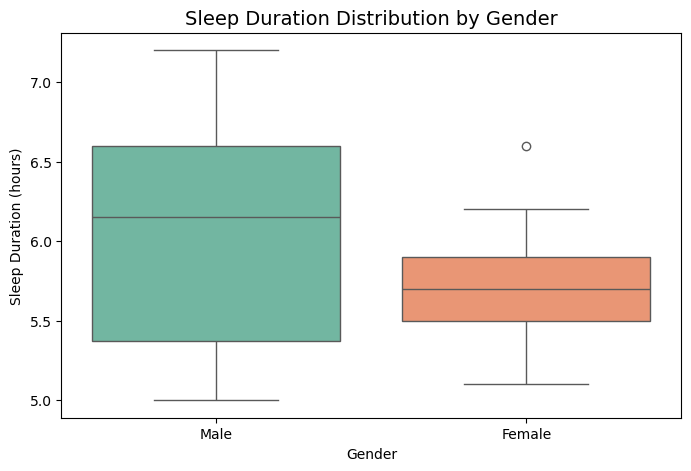

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load demographics dataset (contains sleep_duration + gender) ---
#demo_df = pd.read_csv("/mnt/data/demographic_cleandata.csv")

# --- Summary stats for context ---
summary_stats = df_patient_data.groupby("gender")["sleep_duration"].describe()
print(summary_stats)

# --- 1. Overall distribution of sleep duration ---
plt.figure(figsize=(8,5))
sns.histplot(demo_df["sleep_duration"], bins=20, kde=True, color="skyblue")
plt.title("Overall Distribution of Sleep Duration (All Patients)", fontsize=14)
plt.xlabel("Sleep Duration (hours)")
plt.ylabel("Number of Patients")
plt.show()

# --- 2. Distribution of sleep duration by gender ---
plt.figure(figsize=(8,5))
sns.boxplot(x="gender", y="sleep_duration", data=demo_df, palette="Set2")
plt.title("Sleep Duration Distribution by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Sleep Duration (hours)")
plt.show()




<b> <h3> 10. After carb intake, how do glucose levels change over the next 2 hours, and is there evidence that insulin delivery moderates this change — for each patient? </h3> </b>

<b> Reasoning </b> Glucose spikes are common after carb intake and this query helps to analyse insulin effectiveness. By analyzing the 2-hour window, we can see whether insulin moderates the spike. The results across dataset shows many patients maintaining excellent control while others either spike significantly (above range) or drop too low (below range).


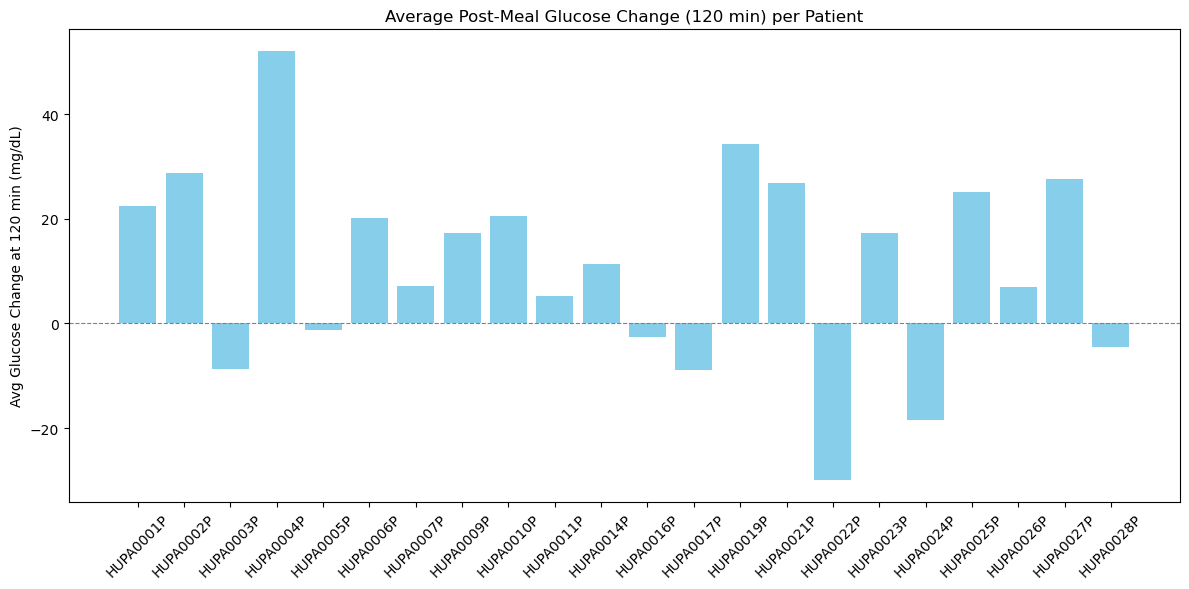

Summary of glucose range distribution across patients (at ~120 min post-meal):
    pct_below_range  pct_in_range  pct_above_range
0          0.000000     55.000000        45.000000
1          9.090909     63.636364        27.272727
2          4.615385     76.410256        18.974359
3          0.000000     25.000000        75.000000
4          0.617284     64.197531        35.185185
5          2.777778     52.777778        44.444444
6          5.416667     40.833333        53.750000
7          0.000000     41.860465        58.139535
8          6.349206     65.079365        28.571429
9          1.851852     55.555556        42.592593
10         3.333333     55.000000        41.666667
11        18.699187     55.284553        26.016260
12         5.714286     52.380952        41.904762
13         3.846154     53.205128        42.948718
14         3.030303     63.636364        33.333333
15        13.235294     82.352941         4.411765
16         4.232804     70.370370        25.396825
17 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("merged_cleandata.csv")
df["time"] = pd.to_datetime(df["time"])

# Collect 2-hour glucose 
meal_windows = []
for pid, pdf in df.groupby("patient_id"):
    pdf = pdf.sort_values("time")
    meal_times = pdf.loc[pdf["carb_input"] > 0, "time"]

    for mt in meal_times:
        window = pdf[(pdf["time"] >= mt) & (pdf["time"] <= mt + pd.Timedelta(hours=2))].copy()
        if len(window) > 0:
            start_glucose = window["glucose"].iloc[0]
            window["glucose_change"] = window["glucose"] - start_glucose
            window["minutes"] = (window["time"] - mt).dt.total_seconds() / 60
            window["patient_id"] = pid
            meal_windows.append(window[["patient_id", "minutes", "glucose_change", "glucose_range_level"]])

patient_trajs = pd.concat(meal_windows)

# Compute avg glucose change (every 2 hrs)
overall_stats = []
for pid, traj_df in patient_trajs.groupby("patient_id"):
    # glucose change near 120 min
    avg_120 = traj_df.loc[traj_df["minutes"].between(110, 130), "glucose_change"].mean()
    
    # glucose range distribution near 2 hour period
    range_counts = traj_df.loc[traj_df["minutes"].between(110, 130), "glucose_range_level"].value_counts(normalize=True)
    
    overall_stats.append({
        "patient_id": pid,
        "avg_glucose_rise_120min": avg_120,
        "pct_below_range": range_counts.get("Below Range", 0) * 100,
        "pct_in_range": range_counts.get("In Range", 0) * 100,
        "pct_above_range": range_counts.get("Above Range", 0) * 100,
    })

overall_df = pd.DataFrame(overall_stats)

# --- Visualization ---
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(overall_df["patient_id"], overall_df["avg_glucose_rise_120min"], color="skyblue")
ax.axhline(0, color="gray", linestyle="--", linewidth=0.8)
ax.set_ylabel("Avg Glucose Change at 120 min (mg/dL)")
ax.set_title("Average Post-Meal Glucose Change (120 min) per Patient")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Summary of glucose ranges ---
summary = overall_df[["pct_below_range", "pct_in_range", "pct_above_range"]]

print("Summary of glucose range distribution across patients (at ~120 min post-meal):")
print(summary)

# Show per-patient details
print("\nDetailed results:")
print(overall_df.sort_values("avg_glucose_rise_120min"))


<b> <h3> 11. Do patients with higher step counts spend more time In Range for glucose? </h3> </b>
<b> Reasoning </b> The query explores if active lifestyle helps to main blood sugar. As per given data there is moderate negative association: patients who averaged more steps tended (in this dataset) to have lower time in range. 

Correlation:
                        time_in_range_percent  avg_daily_steps
time_in_range_percent               1.000000        -0.409438
avg_daily_steps                    -0.409438         1.000000


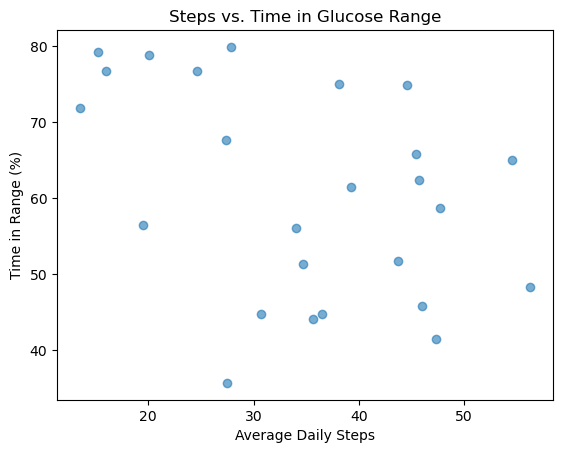

In [31]:
import matplotlib.pyplot as plt

# % time in range per patient
time_in_range = (
    merged_data.groupby("patient_id")["glucose_range_level"]
    .apply(lambda x: (x == "In Range").mean() * 100)
)

# average daily steps per patient
avg_steps = merged_data.groupby("patient_id")["steps"].mean()

# combine into one DataFrame
analysis_df = pd.DataFrame({
    "time_in_range_percent": time_in_range,
    "avg_daily_steps": avg_steps
})

# correlation
print("Correlation:\n", analysis_df.corr())

# scatter plot
plt.scatter(analysis_df["avg_daily_steps"], analysis_df["time_in_range_percent"], alpha=0.6)
plt.xlabel("Average Daily Steps")
plt.ylabel("Time in Range (%)")
plt.title("Steps vs. Time in Glucose Range")
plt.show()


<b> <h3>12.  How does the average basal insulin delivery rate vary across patients when glucose levels are Below Range, In Range, or Above Range? </h3> </b>
<b> Reasoning: </b> This question helps evaluate whether insulin delivery is appropriately modulated by glucose levels and whether patients are at risk of poor regulation due to mismatches.

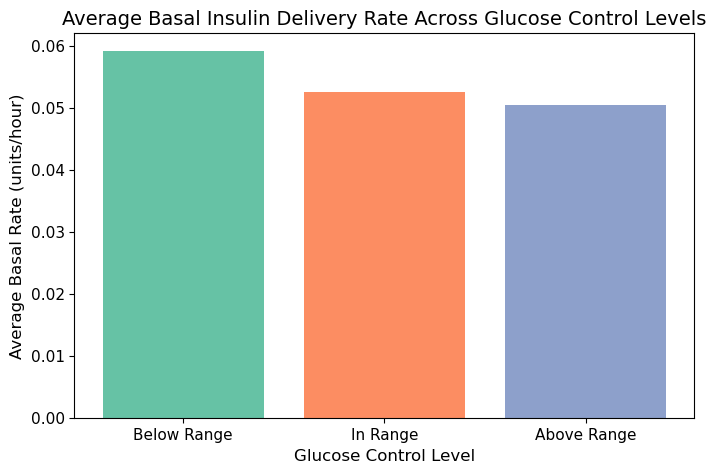

In [30]:
import matplotlib.pyplot as plt

# Group by glucose control level and compute mean basal insulin rate
avg_basal = df_cleaned_data.groupby("glucose_range_level")["basal_rate"].mean().reset_index()

# Define correct category order
order = ["Below Range", "In Range", "Above Range"]
avg_basal["glucose_range_level"] = pd.Categorical(avg_basal["glucose_range_level"], categories=order, ordered=True)
avg_basal = avg_basal.sort_values("glucose_range_level")

# Plot bar chart
plt.figure(figsize=(8,5))
plt.bar(avg_basal["glucose_range_level"], avg_basal["basal_rate"], 
        color=["#66c2a5", "#fc8d62", "#8da0cb"])
plt.title("Average Basal Insulin Delivery Rate Across Glucose Control Levels", fontsize=14)
plt.xlabel("Glucose Control Level", fontsize=12)
plt.ylabel("Average Basal Rate (units/hour)", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()
